# **0. 라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action = 'ignore')

# **1. 데이터 불러오기**

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## **📌 Data Description**
- index: 구분자
- quality: 품질(target 변수) - 범주형
- fixed acidity: 산도
- volatile acidity: 휘발성산
- citric acid: 시트르산
- residual sugar: 잔당(발효 후 와인 속에 남아있는 당분)
- chlorides: 염화물
- free sulfur dioxide: 독립 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소이온농도
- sulphates: 황산염
- alcohol: 도수
- type: 종류(white vs red)

# **2. 데이터 전처리 & EDA**

## **2-1. 데이터 확인하기**

In [3]:
### train 데이터
# index를 제외하면 총 13개 변수를 가짐
# quality(와인의 품질) - target 변수

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
### test 데이터
# index를 제외하면 총 12개 변수를 가짐

test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [5]:
### 필요없는 변수 제거
# index는 불필요한 변수이므로 삭제

train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

In [6]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [7]:
train.shape

(5497, 13)

In [8]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [9]:
test.shape

(1000, 12)

## **2-2. 데이터 구조 확인**

In [10]:
### train 데이터의 column 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


- type을 제외하고는 모두 숫자형 변수이다.
- 결측치는 존재하지 않는다.

In [12]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


- 데이터들 간의 스케일 차이가 존재함을 확인할 수 있다.
    - 표준화(StandardScaler) 진행
- 데이터 중 일부 이상치가 존재함을 짐작할 수 있다.

## **2-3. 범주형 변수 처리**

In [13]:
# type에는 white와 red 두 종류가 있음
# 각각 0,1로 변환

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
train['type'] = enc.fit_transform(train['type']) 
test['type'] = enc.transform(test['type']) # test 데이터로 다시 fitting하면 x

In [14]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [15]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


- 제대로 변환된 것을 확인할 수 있다.

## **2-4. 변수들 간의 상관관계**

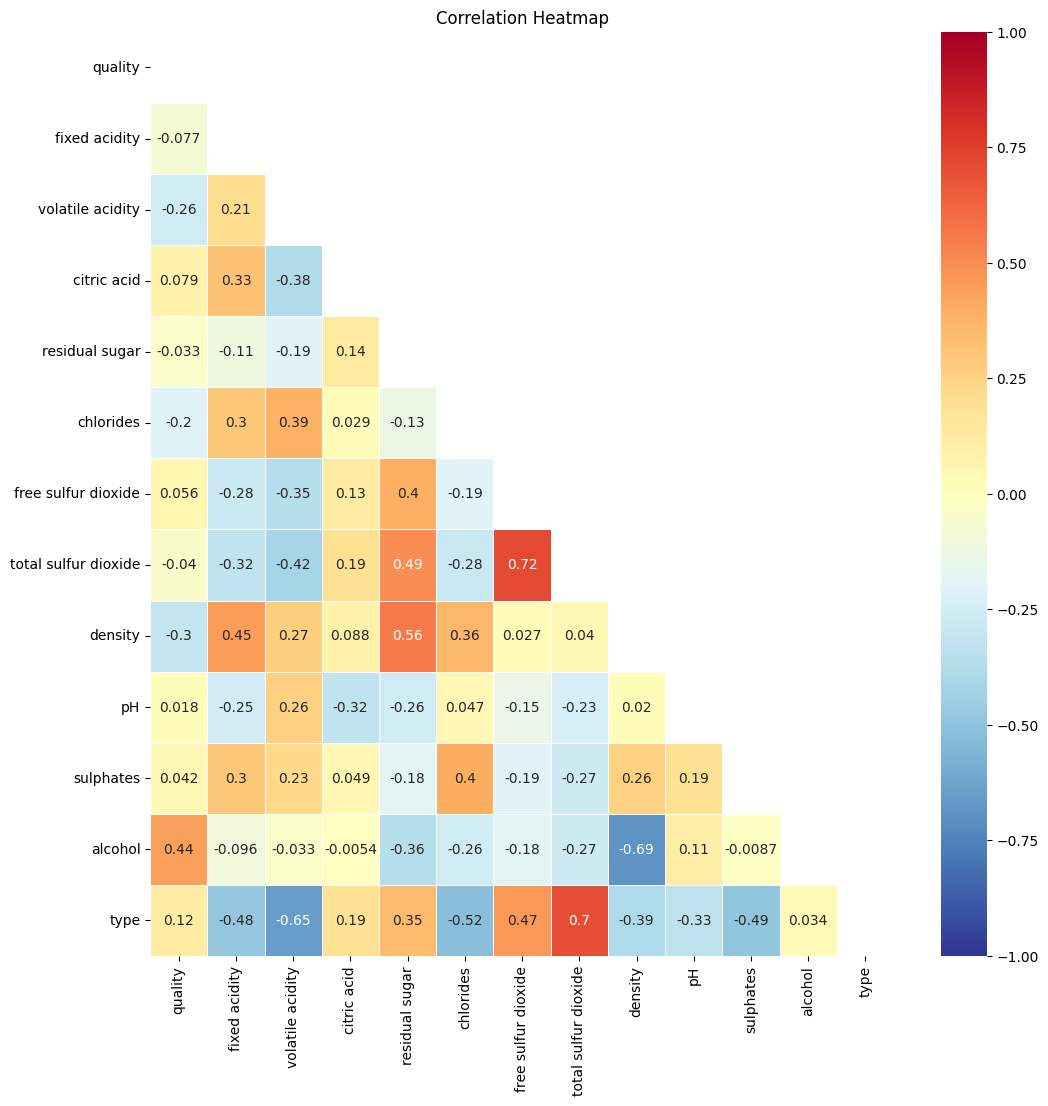

In [16]:
### train의 변수 간 상관관계

# 사이즈 지정
plt.figure(figsize = (12,12))

corr = train.corr()

# 삼각형 마스크 만들기(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths = .5,  # 경계면을 실선으로 구분하기
            vmin = -1,vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )  

plt.title('Correlation Heatmap')
plt.show()

- target 변수(quality)와 상관도가 가장 높은 변수는 'alcohol'이다.
    - 상관계수는 0.44로, 약한 양의 선형 상관관계를 가진다고 할 수 있다.
    - 해당 변수에 이상치가 있다면 제거하는 것을 추후에 고려해 볼 수 있다.
- free sulfur dioxide와 total sulfur dioxide 간의 상관도가 높다.
    - 이름으로 보아 서로 관련성이 높은 변수인 듯 하다.
    - 두 개의 변수 중 조금 더 상관도가 높은 total sulfur dioxide 변수만 남기는 방법도 고려해 볼 수 있을 것 같다.
- density와 alcohol 간의 상관도가 높다.(-0.69)
- type과 total sulfur dioxide 간의 상관도가 높다.(0.7)
---
- 회귀 문제의 경우 변수들 간의 상관도가 높은 경우 다중공선성으로 인한 모델의 성능 저하가 발생할 수 있지만, 분류 문제의 경우 feature 변수들 간의 상관도가 모델의 성능에 엄청난 영향을 미치지는 않는다...?!
    - 일단 분석을 진행

## **2-4. 데이터 분포 확인**

### **a) Target 값의 분포**

In [17]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

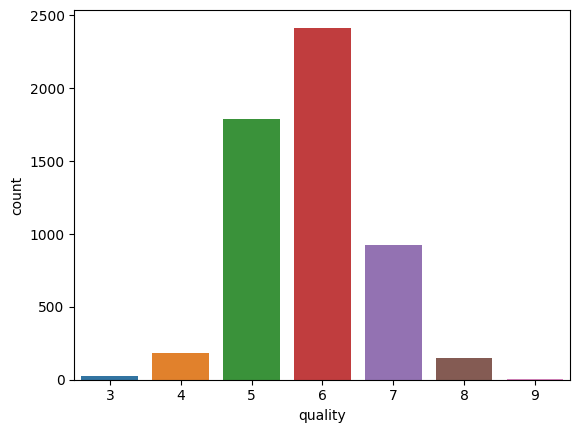

In [18]:
sns.countplot(x = train['quality'])

- quality의 각 클래스 간 불균형이 존재한다.
    - **Oversampling** 또는 **Undersampling**을 고려해 볼 수 있음

### **b) 각 feature 변수들의 분포**

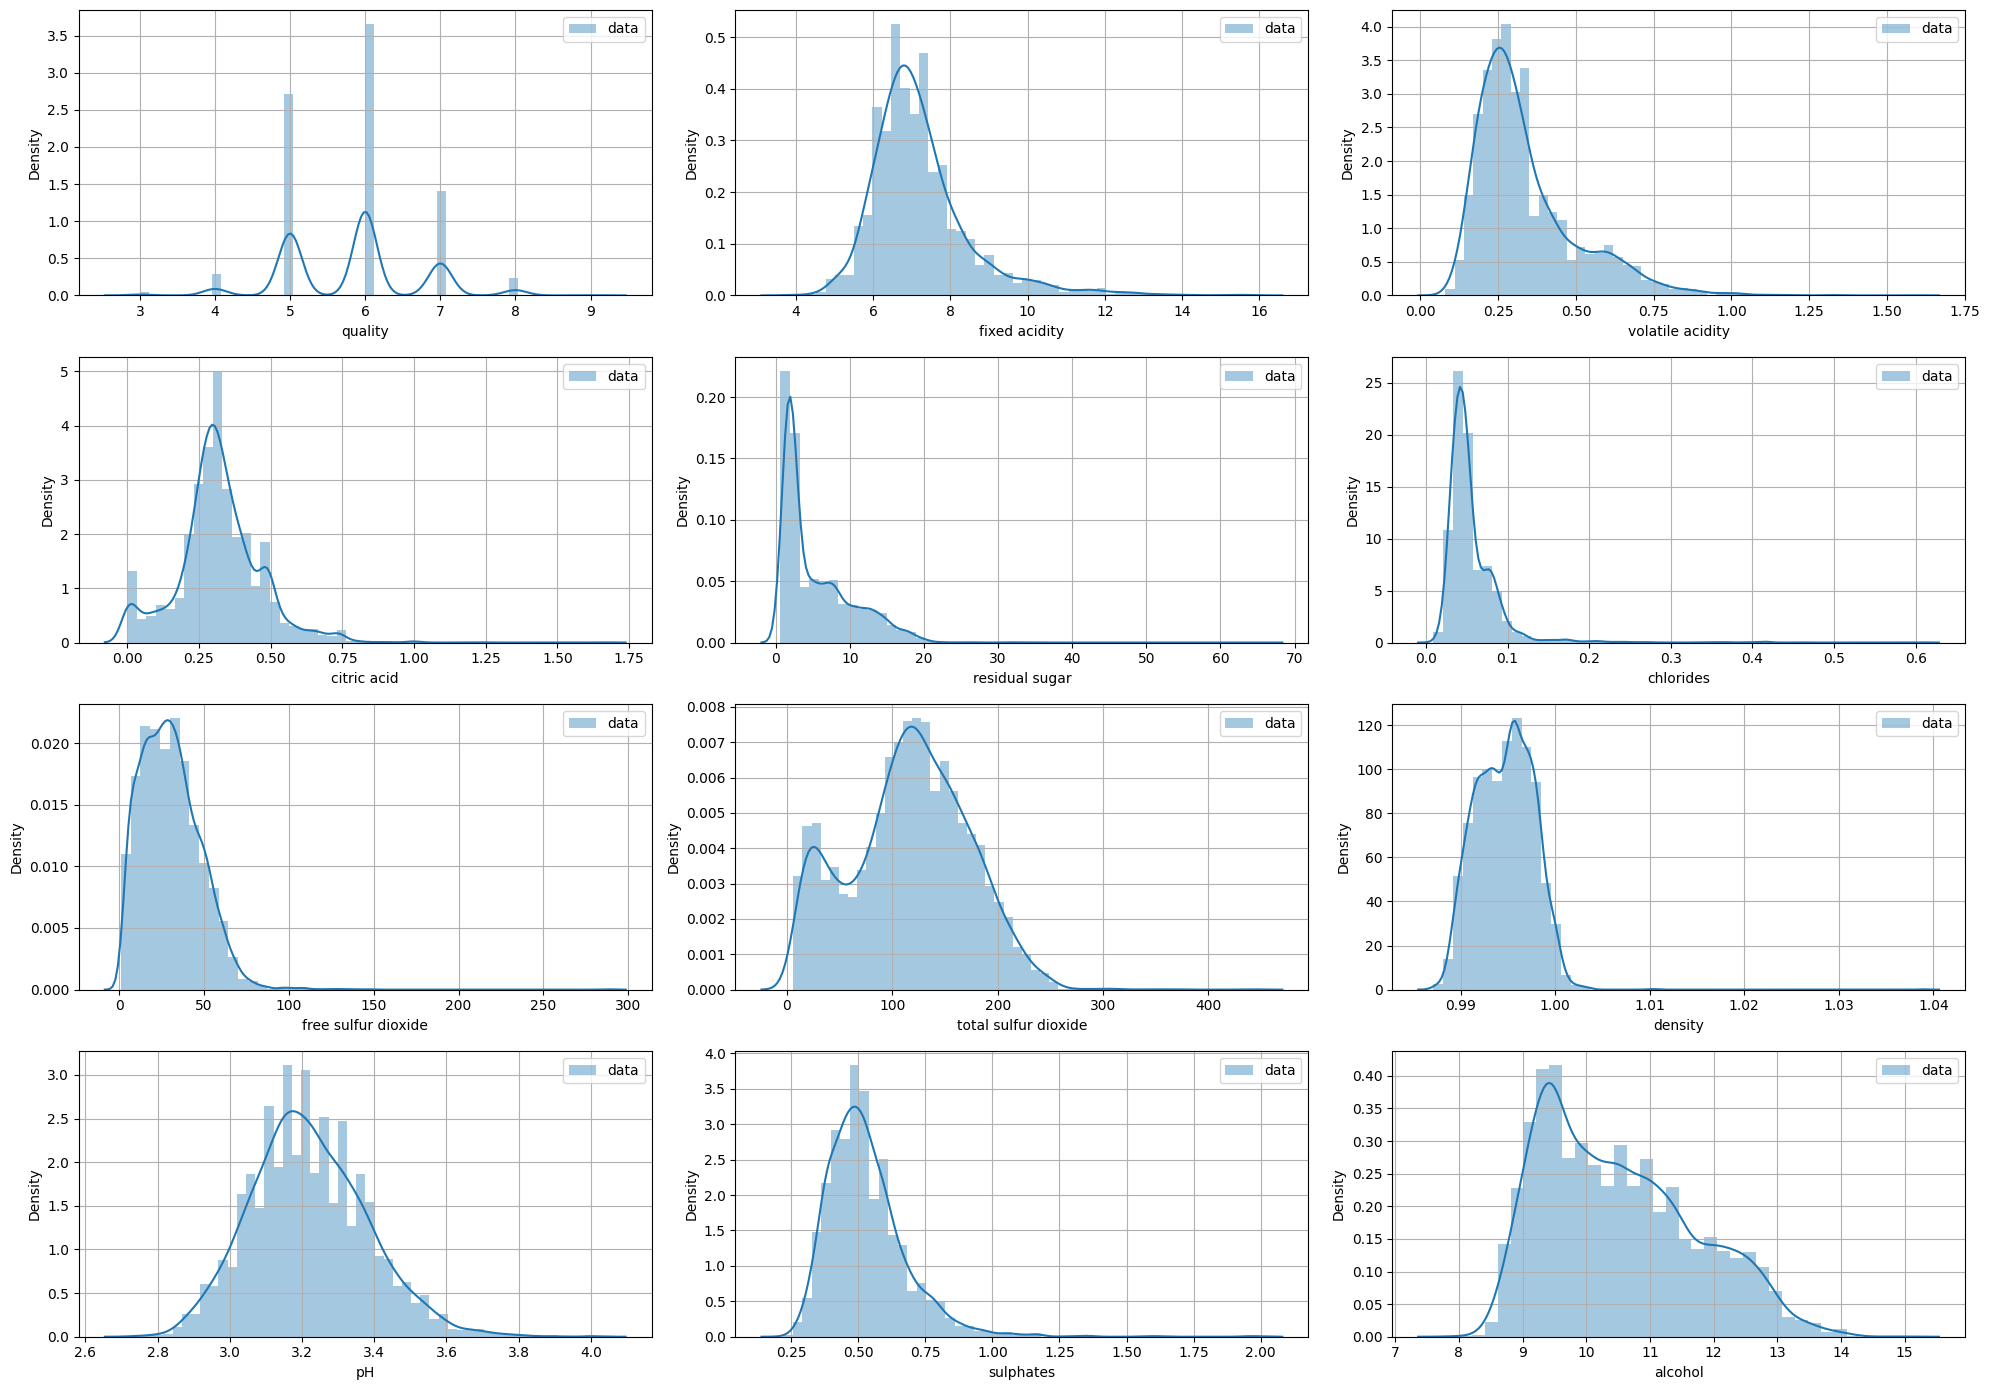

In [19]:
### 변수별 분포 시각화

plt.figure(figsize = (20,14))

for i, col in enumerate(list(train.iloc[:,:-1].columns.values)):
    plt.subplot(4,3,i+1) # 위치 지정
    sns.distplot(train[col], kde = True, label = 'data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- pH 변수는 정규 분포를 따르는 것처럼 보인다.
- 그 외의 feature들은 모두 분포에 편향이 있다고 판단된다.(오른쪽으로 긴 꼬리, **positively skewed** )
    - 데이터 변환 방법: 제곱근(square root), 세제곱근(cube root), **로그 변환(log transformation)**

In [20]:
### 각 변수들의 왜도(skewness) 확인

from scipy.stats import skew

features_idx = train.dtypes[train.dtypes != 'object'].index
skew_features = train[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.086515


In [21]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides              5.185911
sulphates              1.914956
fixed acidity          1.710430
residual sugar         1.498545
volatile acidity       1.497435
free sulfur dioxide    1.310273
dtype: float64


### **c) 각 feature 변수와 target 변수 간의 관계**

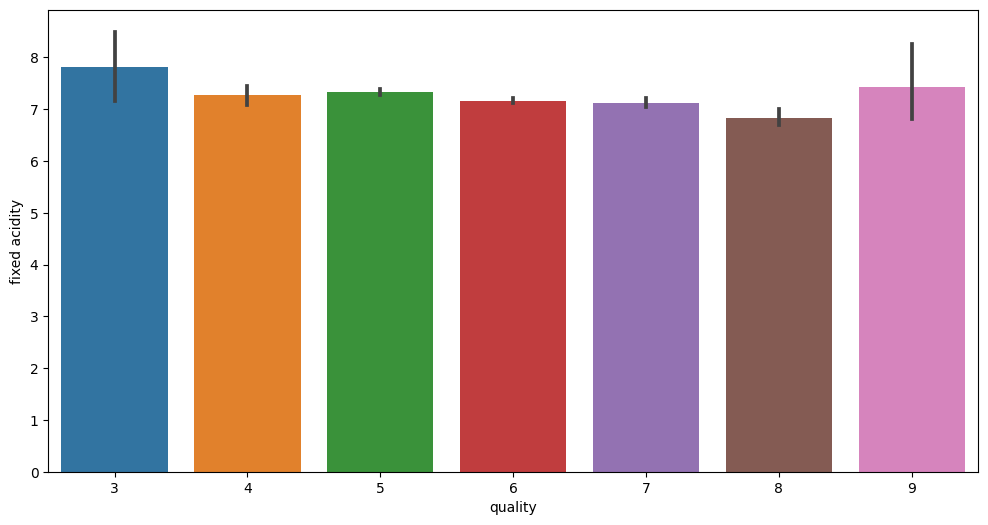

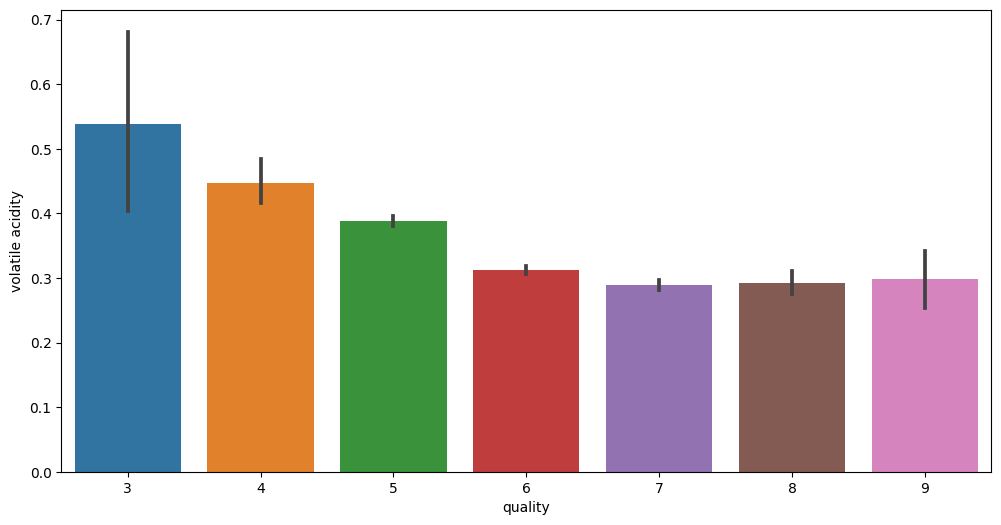

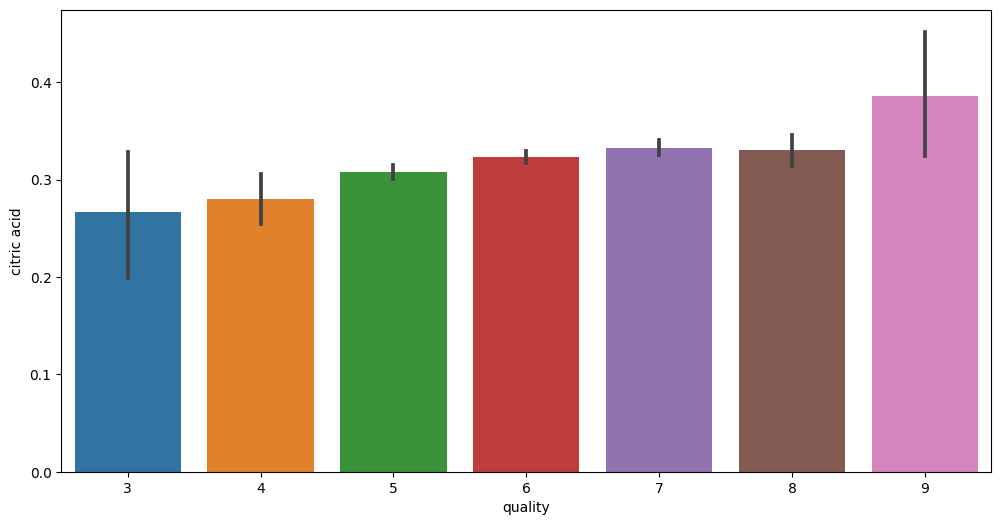

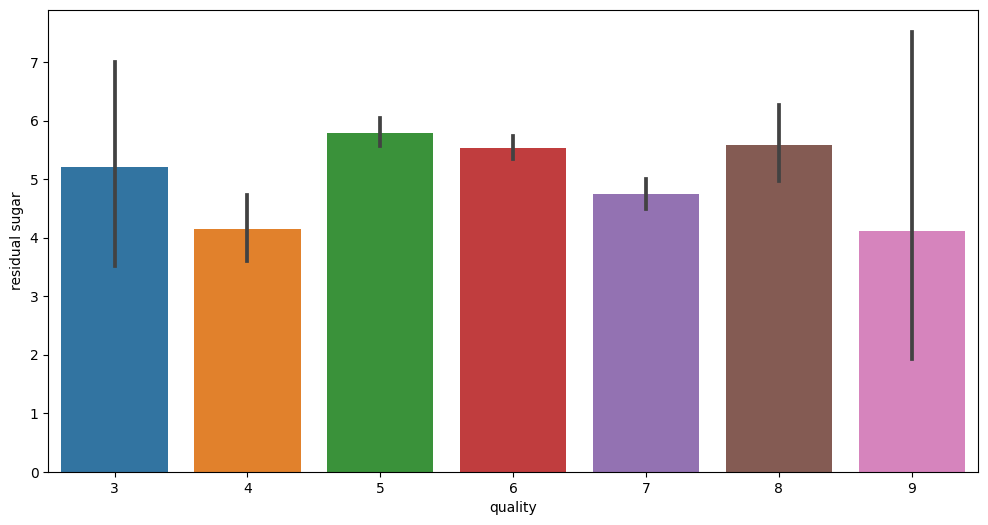

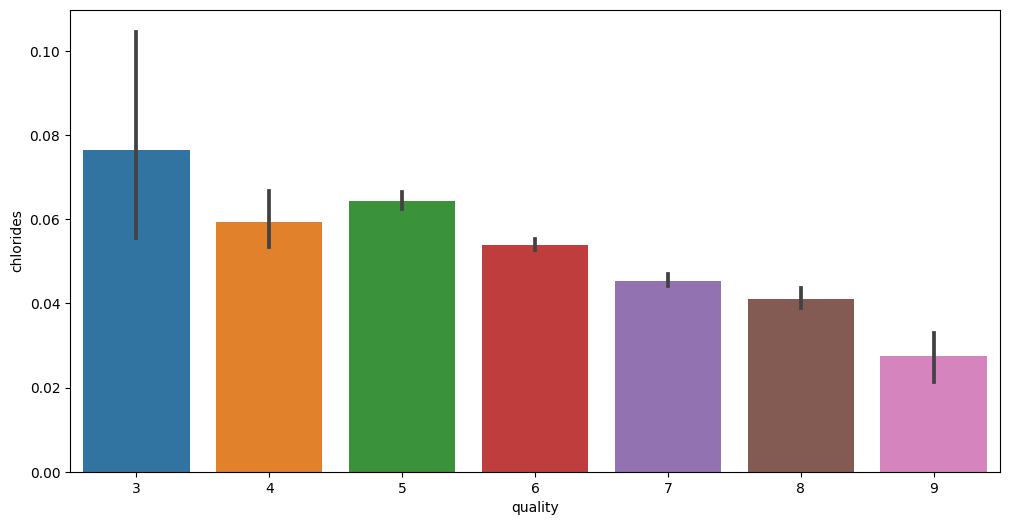

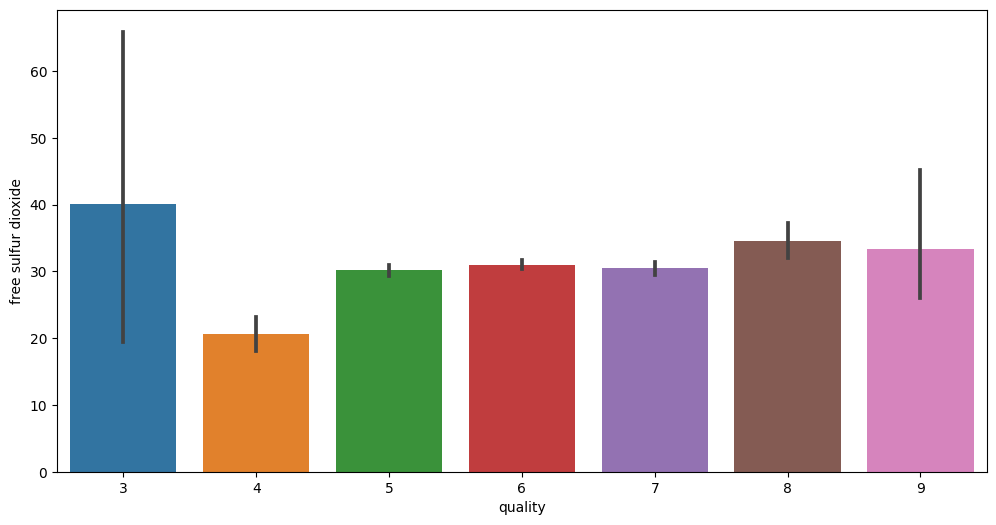

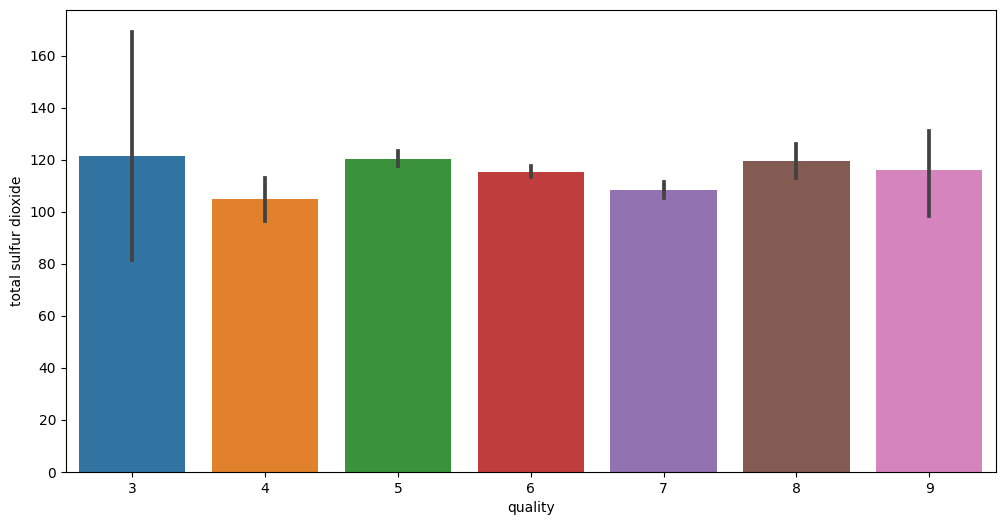

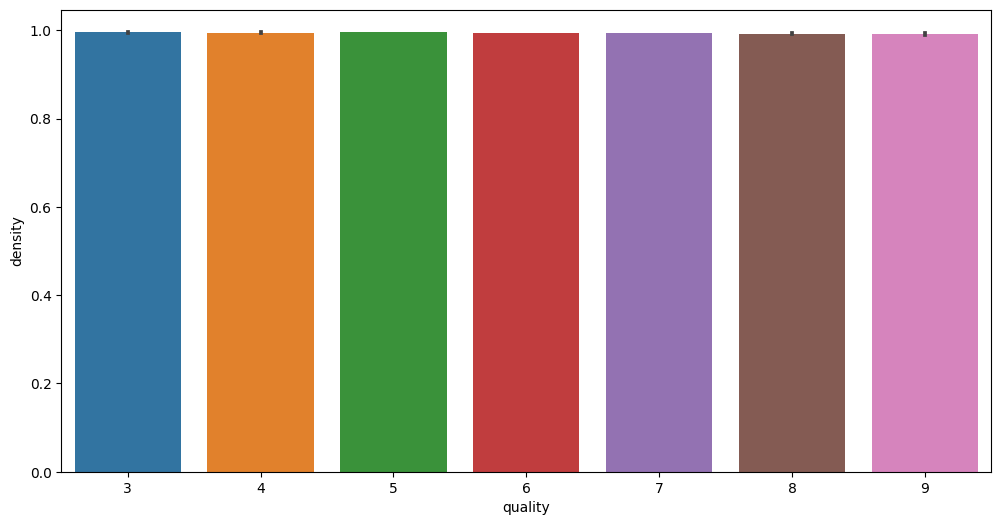

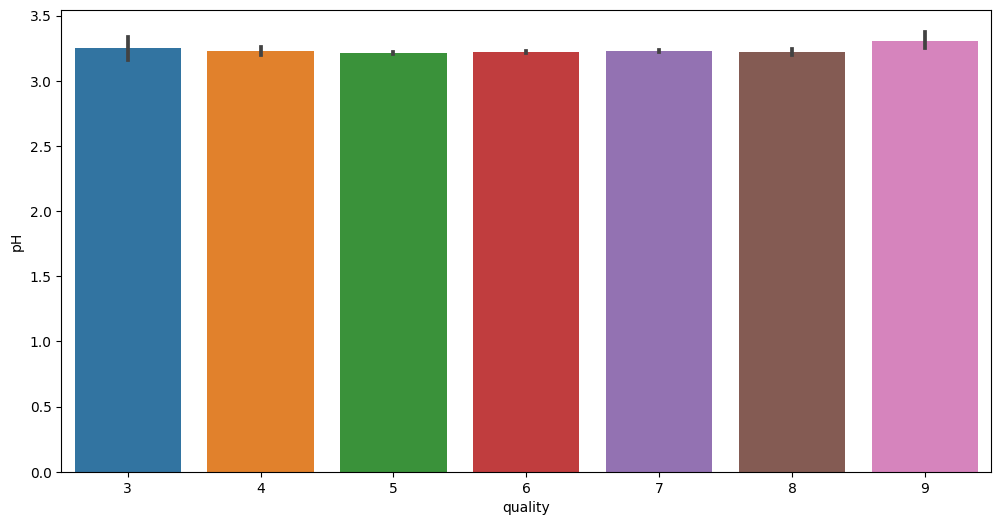

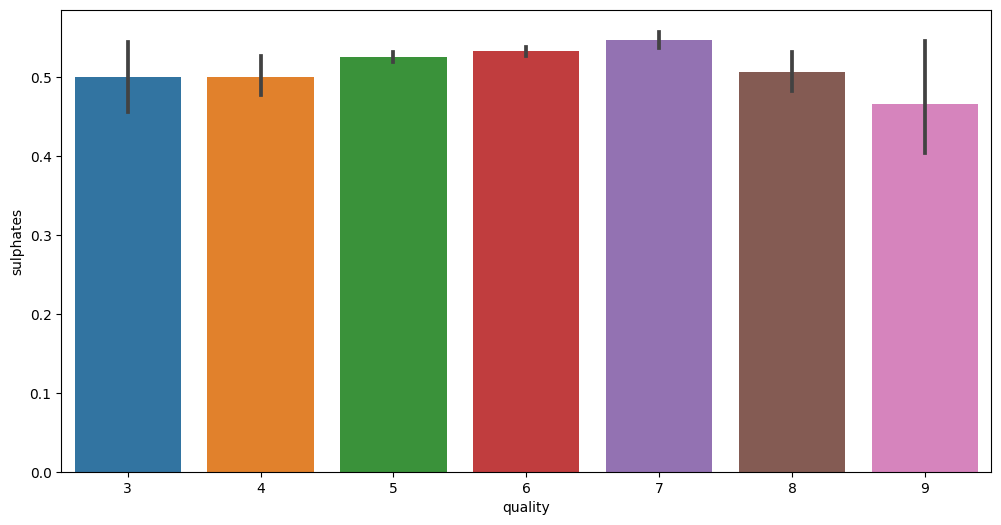

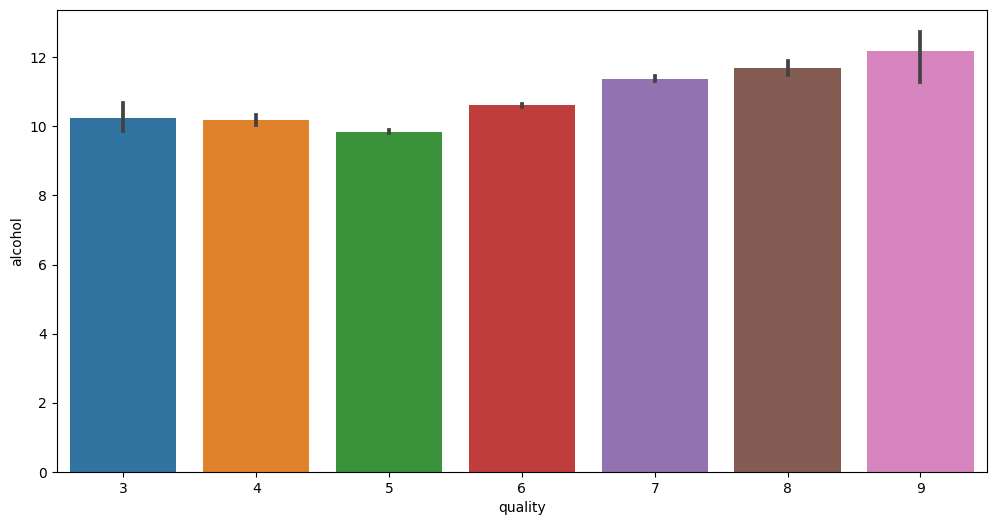

In [22]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', 
                y = train.columns[i + 1], 
                data = train)

# **3. Modeling**

## **3-1. 데이터 준비**

In [23]:
### feature / target 분리

X = train.drop(['quality'], axis = 1)
y = train['quality']

In [24]:
X.shape, y.shape

((5497, 12), (5497,))

In [25]:
### 표준화
# 데이터 간의 스케일 차이 조정

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[-1.25061143,  2.18637672, -1.78193967, ..., -0.60598842,
        -0.25528685,  0.56719657],
       [ 1.23489895,  1.66557358, -1.23056036, ...,  0.39814685,
        -0.84134781, -1.7630572 ],
       [ 0.53584916, -0.78526474,  0.49249999, ..., -0.07044961,
         0.33077411,  0.56719657],
       ...,
       [ 0.45817696, -1.15289048,  0.14788792, ...,  1.26839741,
         0.66566609,  0.56719657],
       [-0.47388943,  0.44015442, -0.05887933, ..., -0.80681547,
        -0.00411787,  0.56719657],
       [-0.16320064,  0.07252867, -1.02379312, ..., -1.14152722,
        -0.67390182,  0.56719657]])

- 제대로 표준화되었음을 확인할 수 있다.

In [26]:
### 교차 검증
# target 변수의 클래스가 불균형함
# target의 속성값의 개수를 동일하게 가져오기 위해 StratifiedKFold 활용

from sklearn.model_selection import StratifiedKFold

n_splits = 5 # 폴드 수 지정
skf = StratifiedKFold(n_splits = n_splits, 
                      random_state = 0, shuffle = True)

## **3-2. 기본 단일 모델** 

**📌 a) 선형 알고리즘(Linear Algorithm)**  
- LDA(Linear Discriminant Analysis)
- 경사하강법(SGDClassifier)

**📌 b) 비선형 알고리즘(Non-linear Algorithm)**
- 최소 근접 알고리즘(k-Nearest Neighbors)
- 결정 트리(Decision Tree)
- 가우시안 나이브 베이즈(Gaussian Naive Bayes)
- 서포트 벡터 머신(SVC)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
### 활용할 모델 정의

models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(random_state = 0)))

In [34]:
### 순차적으로 modeling + 학습/예측/검증

results = []
names = []
metrics = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, 
                                 cv = skf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(metrics),3))

LDA: 0.536
SGD: 0.490
KNN: 0.547
DT: 0.592
NB: 0.369
SVC: 0.566

모든 모델의 평균 메트릭(정확도): 0.517


## **3-3. 기본 앙상블 모델 생성**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
ensemble = []

ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
ensemble.append(('XGB', XGBClassifier(random_state = 0)))
ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [43]:
### 순차적으로 modeling + 학습/예측/검증

results = []
names = []
metrics = []

for name, model in ensemble:
    cv_results = cross_val_score(model, X, y, 
                                 cv = skf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(metrics),3))

RF: 0.677
Bagging: 0.635
GB: 0.583
XGB: 0.648
LGBM: 0.651
Ada: 0.355
ET: 0.674

모든 모델의 평균 메트릭(정확도): 0.603


# **4. 제출 파일 생성**

In [ ]:
submission = pd.read_csv('./data/sample_submission.csv')

In [ ]:
# submission['quality'] = y_pred

In [ ]:
# submission

In [ ]:
# csv 파일로 저장합니다.
# submission.to_csv('baseline.csv', index=False)